# Image Classification Using CNN
# we'll build a CNN using Keras to use it classifying thousands of pictures in two  different categories

# Data link : https://www.kaggle.com/datasets/rashikrahmanpritom/gender-recognition-dataset

# first to import libraries

In [3]:
import pandas as pd

import numpy as np

#handling showing images 
import matplotlib.pyplot as plt
%matplotlib inline

import glob as gb
import os

import glob as gb


In [4]:

import cv2

import tensorflow as tf
from tensorflow import keras

### now to define the path ( to swtich it between jupyter notebook & kaggle kernel)

In [5]:



trainpath = 'C:/Users/mohamed/Downloads/neural/datset2/Train/'
testpath = 'C://Users//mohamed//Downloads//neural//datset2//Test//'
predpath = 'C://Users//mohamed//Downloads//neural//datset2//pred//'



# Open Folders
### now let's first check the Train folder to have a look to its content

In [6]:


for folder in  os.listdir(trainpath) :
    print(folder)
    files = gb.glob(pathname= str( trainpath+folder+ '/*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')

Female
For training data , found 5211 in folder Female
Male
For training data , found 5924 in folder Male


### ok , how about the test folder

In [7]:

for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath+folder+ '/*.png'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 502 in folder Female
For testing data , found 777 in folder Male


### now for prediction folder

In [8]:


files = gb.glob(pathname= str( predpath+ '/*.png'))
print(f'For valid data , found {len(files)} in folder {folder}')

For valid data , found 1039 in folder Male


In [9]:
#dictionary of all exist classes and its numberic values in used in dataset 
code = {'Male':0 ,'Female':1,}

#used for getting name of class x  using its number n or y
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

## Checking Images
### now we need to heck the images sizes , to know ow they looks like
### how about the images sizes in train folder

In [10]:
size = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
        
pd.Series(size).value_counts()

(100, 100, 3)    11135
dtype: int64

### how about the images sizes in Test folder

In [11]:
size = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(100, 100, 3)    1279
dtype: int64

In [12]:
size = []

files = gb.glob(pathname= str( predpath  + '/*.png'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(100, 100, 3)    1039
dtype: int64

In [13]:
s = 80

In [14]:
#empty list to contain images itself called featues for the CNN model  
X_train = []
#empty list to contain actual value for each image
y_train = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        #using cv2.resize without determine interpolation make it preserve aspect ratio for each image 
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [15]:
print(f'we have {len(X_train)} items in X_train')

we have 11135 items in X_train


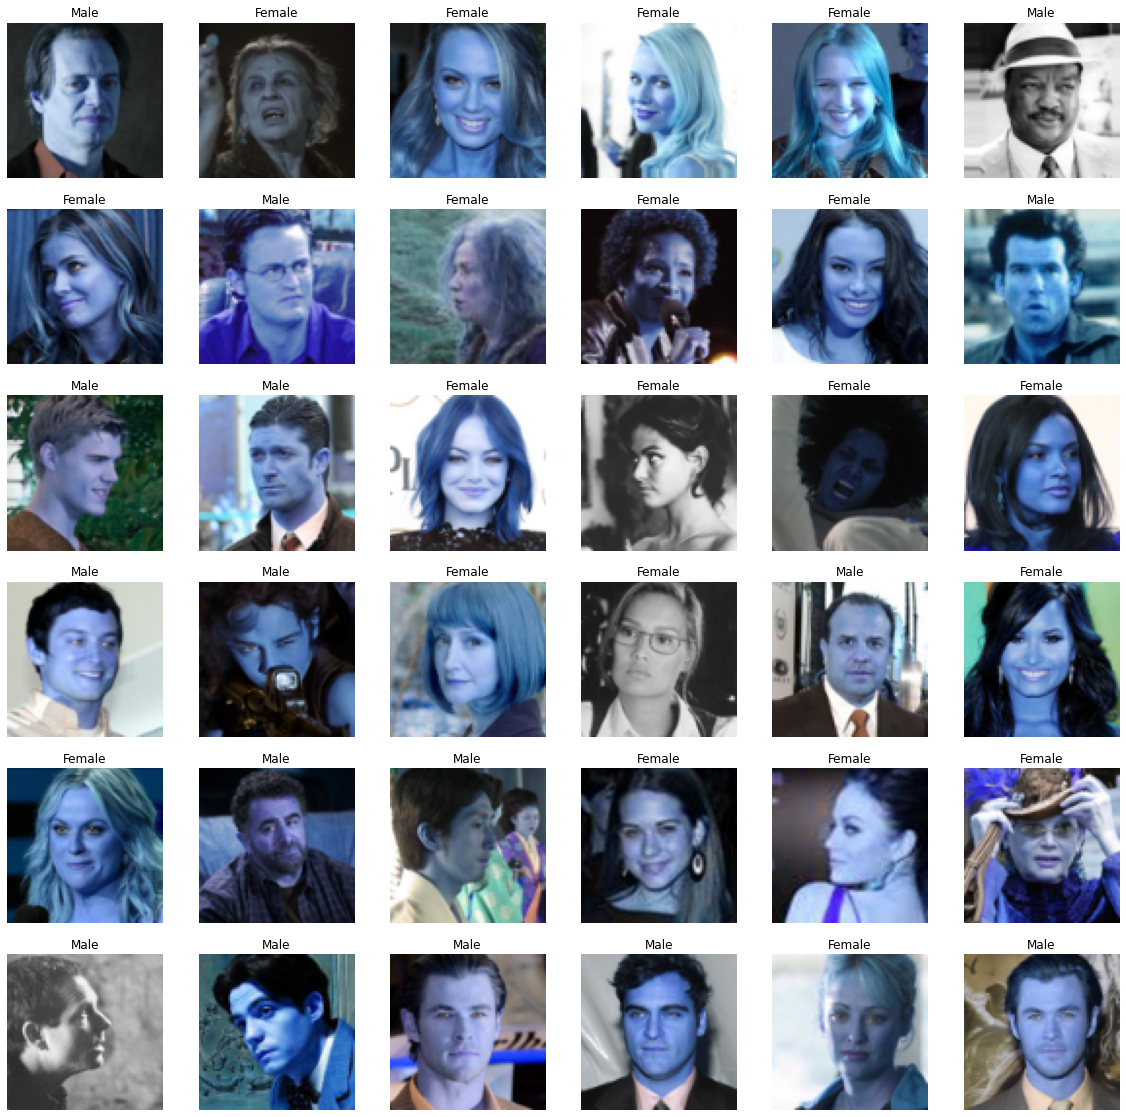

In [16]:


#(20*20) inches of figure
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [17]:
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str(testpath  + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [18]:
print(f'we have {len(X_test)} items in X_test')

we have 1279 items in X_test


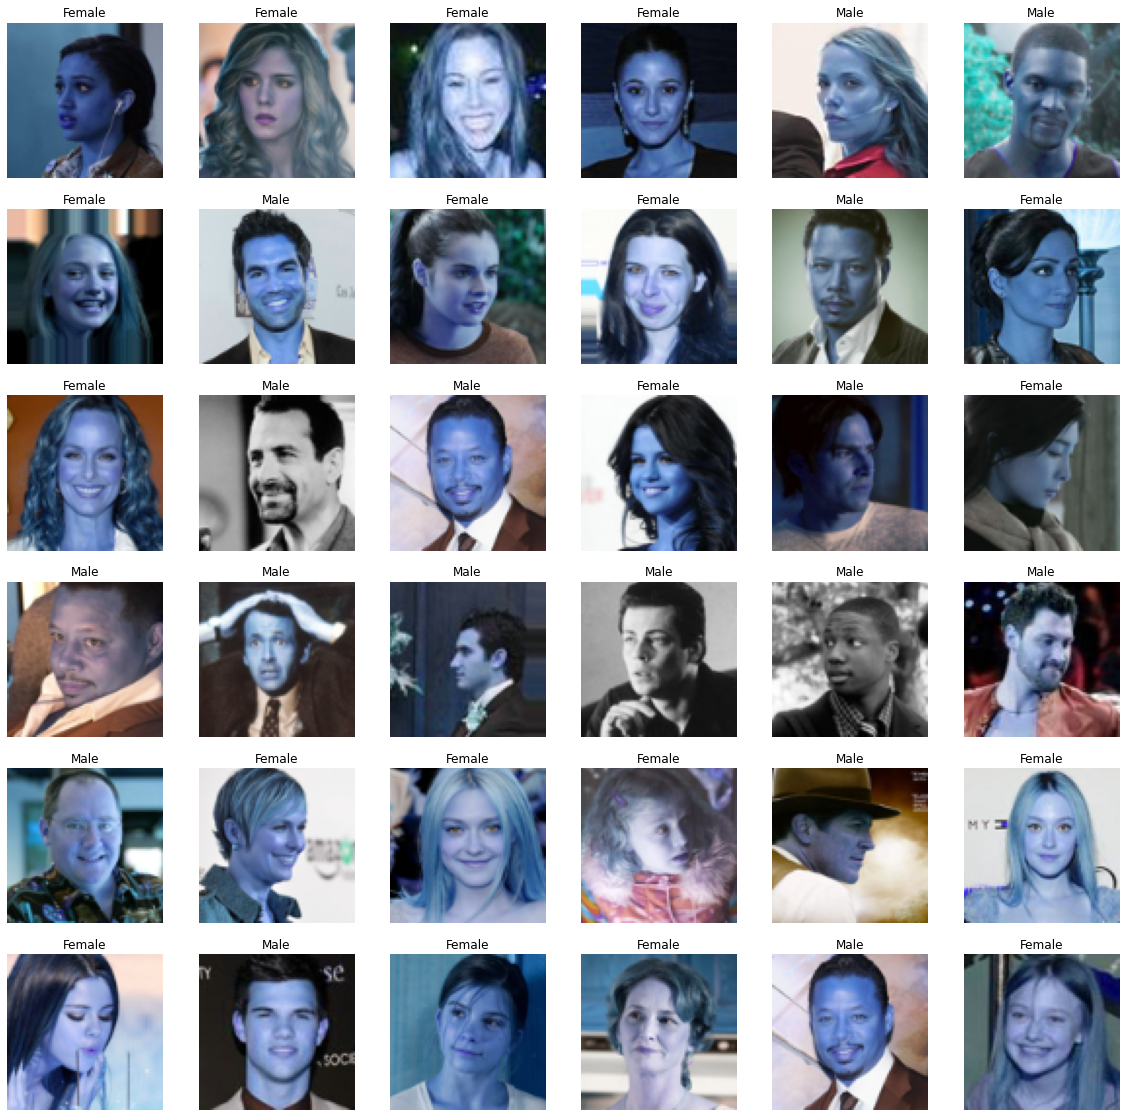

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [20]:
X_pred = []

files = gb.glob(pathname= str(predpath   + '/*.png'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [21]:
print(f'we have {len(X_pred)} items in X_pred')

we have 1039 items in X_pred


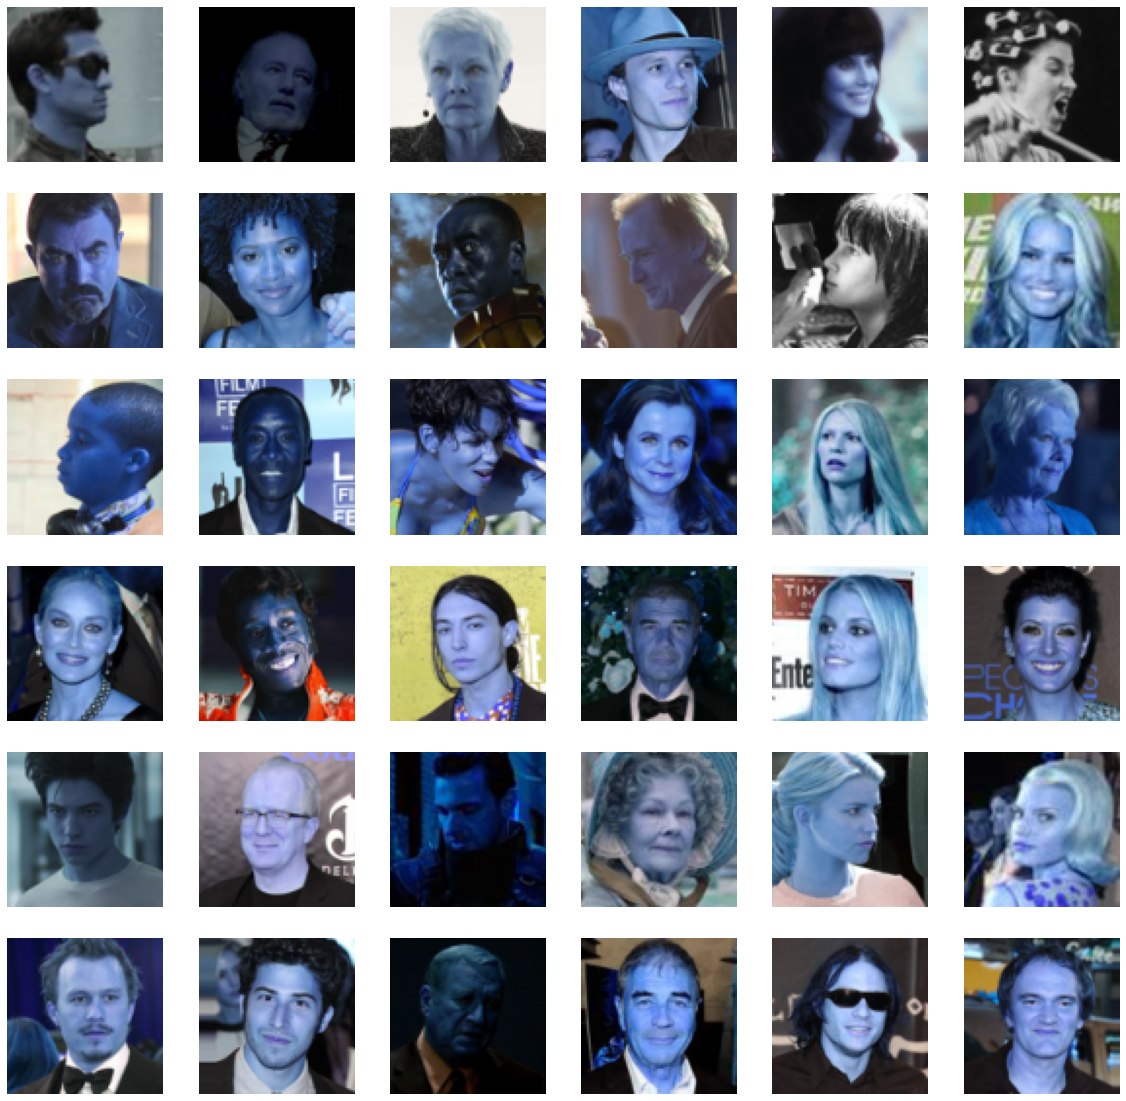

In [22]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (11135, 80, 80, 3)
X_test shape  is (1279, 80, 80, 3)
X_pred shape  is (1039, 80, 80, 3)
y_train shape  is (11135,)
y_test shape  is (1279,)


In [24]:
X_train,X_test=X_train/255.0,X_test/255.0

## building the model

In [25]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.MaxPool2D(2,2),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(),   
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.25) ,            
        keras.layers.Dense(2,activation='softmax') ,  
        ])

In [26]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 150)       4200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 150)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 80)        108080    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14450)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               

In [30]:
epochs = 10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/10
11135/11135 [==============================] - 390s 35ms/step - loss: 0.0515 - acc: 0.9805
Epoch 2/10
11135/11135 [==============================] - 397s 36ms/step - loss: 0.0451 - acc: 0.9863
Epoch 3/10
11135/11135 [==============================] - 422s 38ms/step - loss: 0.0429 - acc: 0.9855
Epoch 4/10
11135/11135 [==============================] - 433s 39ms/step - loss: 0.0436 - acc: 0.9837
Epoch 5/10
11135/11135 [==============================] - 385s 35ms/step - loss: 0.0288 - acc: 0.9907
Epoch 6/10
11135/11135 [==============================] - 456s 41ms/step - loss: 0.0361 - acc: 0.9884
Epoch 7/10
11135/11135 [==============================] - 462s 42ms/step - loss: 0.0301 - acc: 0.9905
Epoch 8/10
11135/11135 [==============================] - 418s 38ms/step - loss: 0.0139 - acc: 0.9957
Epoch 9/10
11135/11135 [==============================] - 358s 32ms/step - loss: 0.0169 - acc: 0.9940
Epoch 10/10
11135/11135 [==============================] - 358s 32ms/step - loss: 

In [31]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1279/1279 [==============================] - 14s 11ms/step
Test Loss is 0.8184126653738373
Test Accuracy is 0.8647380760165282


In [32]:
y_result = KerasModel.predict(X_pred_array)
print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (1039, 2)


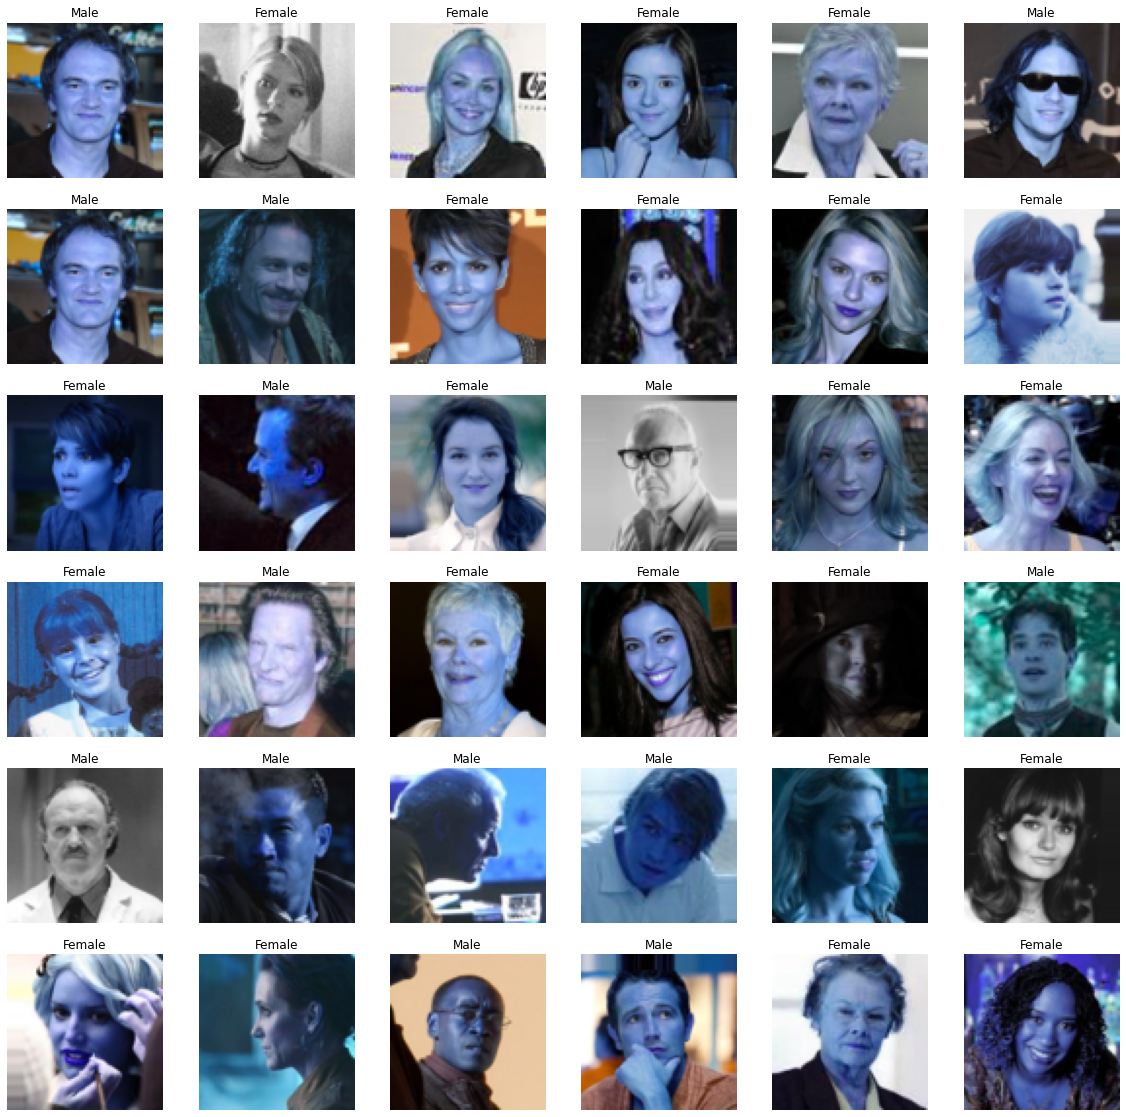

In [33]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

Text(0.5, 1.0, 'Male')

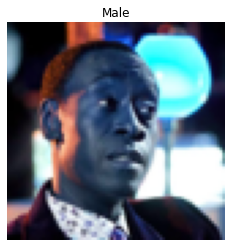

In [36]:
i=np.random.randint(0,len(X_pred))
plt.imshow(X_pred[i])    
plt.axis('off')
plt.title(getcode(np.argmax(y_result[i])))

## save the model 

In [41]:
KerasModel.save('testb.model')

## load the model

In [25]:
new_model = tf.keras.models.load_model('testa.model')

In [26]:
ModelLoss, ModelAccuracy = new_model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1279/1279 [==============================] - 11s 9ms/step
Test Loss is 0.2707186100816615
Test Accuracy is 0.8960125091674274


In [27]:
new_model.evaluate(X_train, y_train)

11135/11135 [==============================] - 106s 10ms/step


[0.17703403031338905, 0.930040413031516]

In [29]:
y_result = new_model.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (1039, 2)


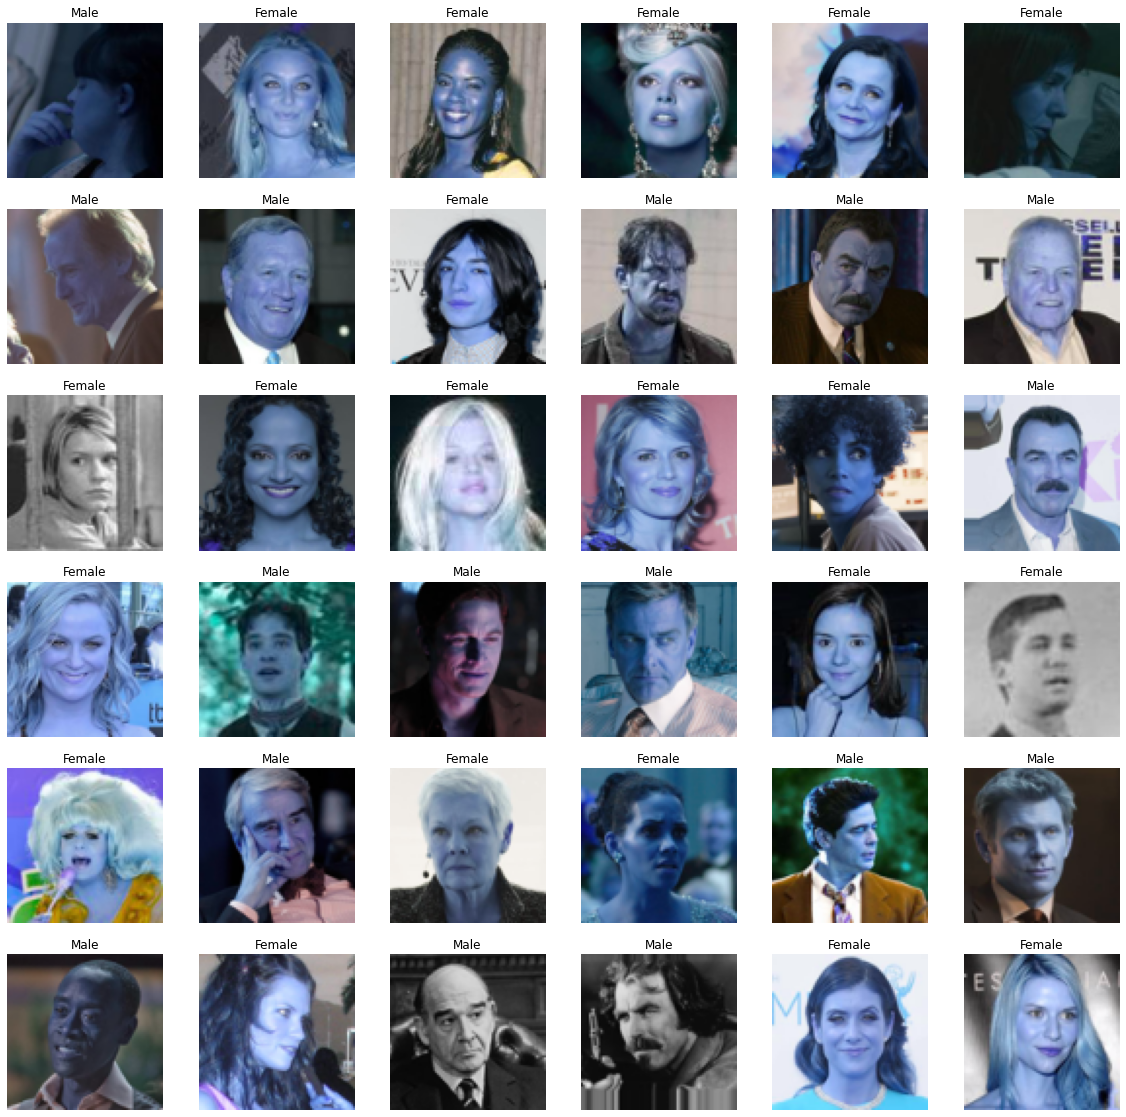

In [30]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

Text(0.5, 1.0, 'Female')

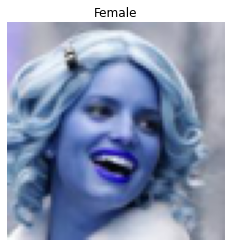

In [58]:
i=np.random.randint(0,len(X_pred))
plt.imshow(X_pred[i])    
plt.axis('off')
plt.title(getcode(np.argmax(y_result[i])))